In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import re

In [ ]:
from parser import parser

In [ ]:
wiki_data = parser(['/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Repos/turkish-treebanks/data/wiki.conllu','/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Repos/turkish-treebanks/data/web.conllu'],output_name='wiki_parsed')

## Functions


In [2]:
def import_data(file_name, parsed=True):
    if not parsed:
        parser(file_name,output_name=file_name.split(".")[0])
        file_name = file_name.split(".")[0]+".txt"
    
    data = open(f"{file_name}", 'r', encoding='utf-8').read()
    pairs = [token.split('\t') for token in data.split('\n')]
    
    return pairs    

In [ ]:
total_pairs = import_data('/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/parse_dataset.txt')
# web_pairs = import_data("/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Scripts/web_data.txt")
# trmorph18_pairs = import_data("/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Data/TrMor2018/TrMor2018/trmor2018.train")

In [ ]:
total_pairs[1]

['da', 'da+PRT+Proper=False', 'tr-forum:00000222:S023']

In [ ]:
# morse_pairs = [(token) for token in trmorph18_pairs if not token[0].startswith("<")]

In [12]:
def extract_pos(token):
    feats = token.split("+")
    return [f for f in feats if f.isupper() or f.startswith("DB")]

In [13]:
def get_tag_counts(pairs):
    try:
        morphs = [token[1] for token in pairs]
    except:
        morphs = [token[1] for token in pairs[:-1]]

    pos = []
    for token in morphs:
        pos.extend(extract_pos(token))
    feats = [token.split("+")[2:] for token in morphs]
    feat_extend = []
    for feat in feats:
        feat_extend.extend(feat)

    return pd.Series(pos).value_counts(), pd.Series(feat_extend).value_counts()

## Unique Tokens

In [29]:
token_list = [i[0] for i in total_pairs]

In [31]:
total_pos_counts.index

Index(['NOUN', 'VERB', 'PUNCT', 'ADJ', 'ADP', 'CONJ', 'DET', 'ADV', 'NUM',
       'PRON', 'PRT', 'X', 'ONOM', 'AFFIX'],
      dtype='object')

In [30]:
len(pd.Series(token_list).unique())

25773

In [ ]:
print(f"""Total Dataset
Total type: {len(token_list)}
Total token: {len(pd.Series(token_list).unique())}""")

Total Dataset
Total type: 66445
Total token: 25773


In [ ]:
token_count = pd.Series(token_list).value_counts()
token_count[token_count > 100]

.             4188
,             2340
ve            1610
bir           1000
bu             410
için           404
-              374
da             374
)              351
(              351
ile            345
olarak         334
?              307
Bu             288
''             287
de             274
``             270
olan           242
çok            221
daha           215
sonra          196
gibi           184
...            161
:              148
en             145
ilk            143
kadar          139
tarafından     133
ise            124
;              121
veya           116
büyük          101
dtype: int64

## POS - Feature Count

In [14]:
train_pairs =  import_data("/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Datasets/baseline/train.txt")[:-1]
val_pairs = import_data("/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Datasets/baseline/dev.txt")[:-1]
test_pairs = import_data("/home/kara/Documents/Courses/Fall 2021/LING412 - RESEARCH & WRITING/Datasets/baseline/test.txt")[:-1]

In [15]:
train_pairs[-1]

['konuk',
 'konuk+NOUN+PersonNumber=A3sg+Possessive=Pnon+Case=Bare+Proper=False',
 'tr-review:00000022:S006']

In [18]:
total_pos_counts, total_feats_counts = get_tag_counts(train_pairs+val_pairs+test_pairs)

In [41]:
def plot_pos(counts):
    plt.rcParams['figure.figsize'] = [22*3, 3*3]
    plt.bar(counts.index, counts.values)
    
def plot_feats(counts):
    plt.rcParams['figure.figsize'] = [250, 3]
    plt.bar(counts.index, counts.values)

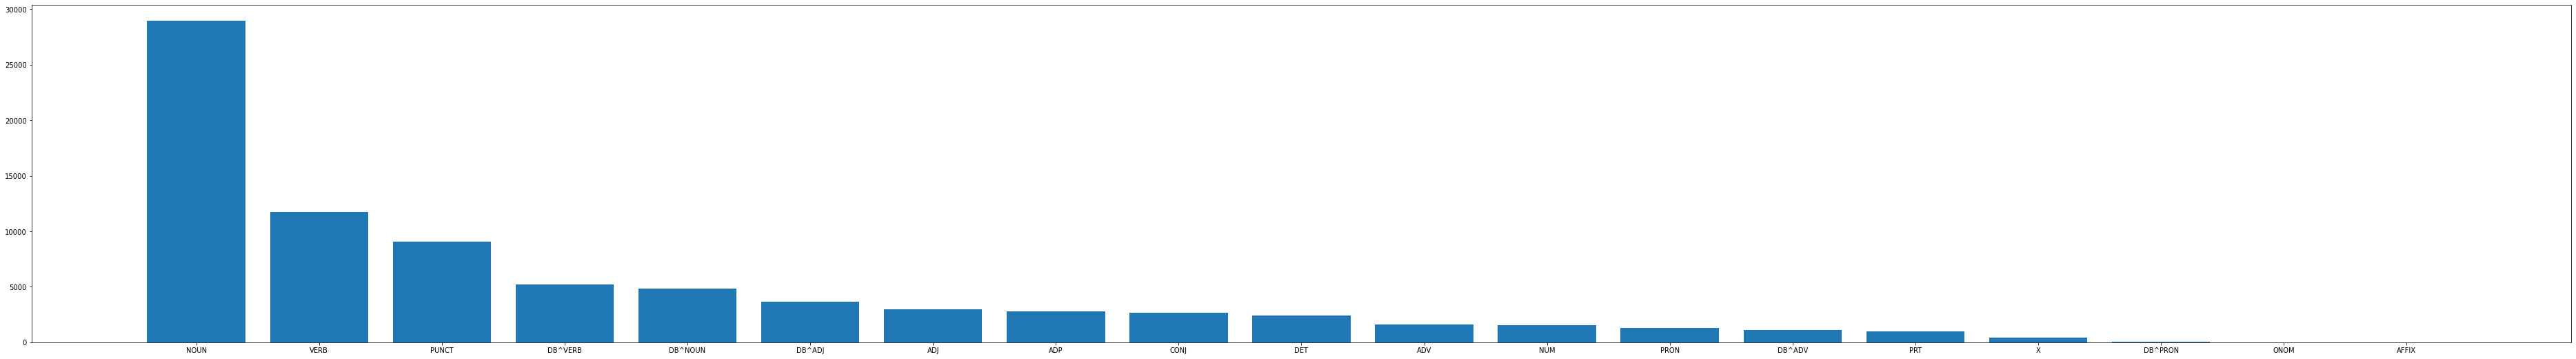

In [42]:
plot_pos(total_pos_counts)

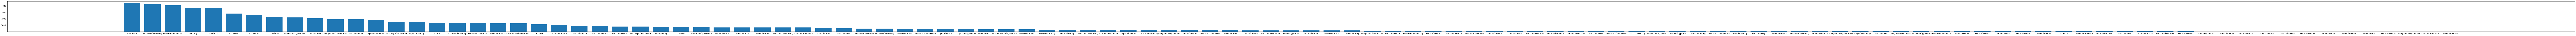

In [ ]:
plot_feats(total_feats_counts[10:])

### Input Output Lengths

In [ ]:
def input_output_length(pairs):
    raws = [i[0] for i in pairs[:-1]]
    morphs = [i[1] for i in pairs[:-1]]

    input_seq_length = []
    output_seq_length = []

    for token in raws:
        input_seq_length.append(len(token))

    for token in morphs:
        tokens = token.split("+")
        output_seq_length.append(len(tokens))

    input_seq_length = pd.Series(input_seq_length)
    output_seq_length = pd.Series(output_seq_length)
    
    return input_seq_length, output_seq_length

In [ ]:
web_input_length, web_output_length = input_output_length(total_pairs)

In [ ]:
web_input_length.describe()

count    66444.000000
mean         5.727801
std          3.408939
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         28.000000
dtype: float64

In [ ]:
web_output_length.describe()

count    26508.000000
mean         5.712238
std          2.640413
min          2.000000
25%          3.000000
50%          6.000000
75%          7.000000
max         19.000000
dtype: float64

In [ ]:
wiki_input_length, wiki_output_length = input_output_length(wiki_pairs)

In [ ]:
wiki_input_length.describe()

count    39932.000000
mean         5.844686
std          3.429878
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         24.000000
dtype: float64

In [ ]:
wiki_output_length.describe()

count    39932.000000
mean         5.699990
std          2.547301
min          2.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         23.000000
dtype: float64

In [ ]:
morse_input_length, morse_output_length = input_output_length(morse_pairs)

## Split

In [24]:
train_pairs = import_data("train.txt")
val_pairs = import_data("dev.txt")
test_pairs = import_data("test.txt")

In [25]:
train_pos_counts, train_feats_counts = get_tag_counts(train_pairs)
val_pos_counts, val_feats_counts = get_tag_counts(val_pairs)
test_pos_counts, test_feats_counts = get_tag_counts(test_pairs)

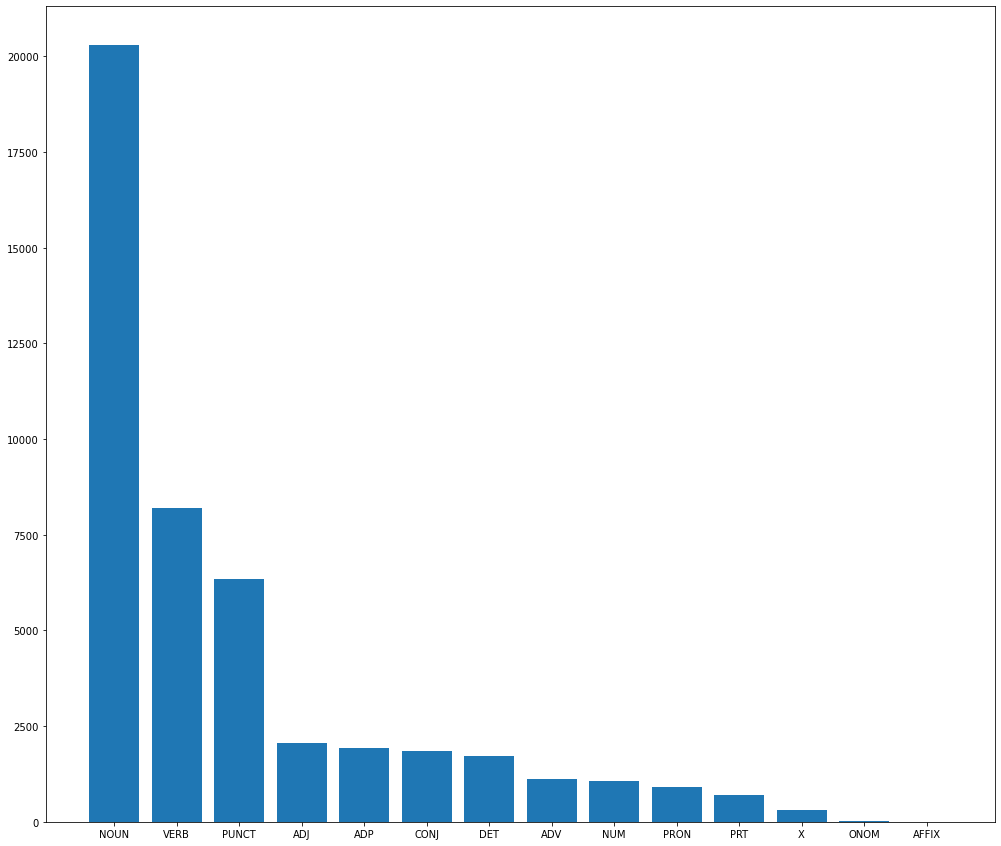

In [26]:
plot_pos(train_pos_counts)

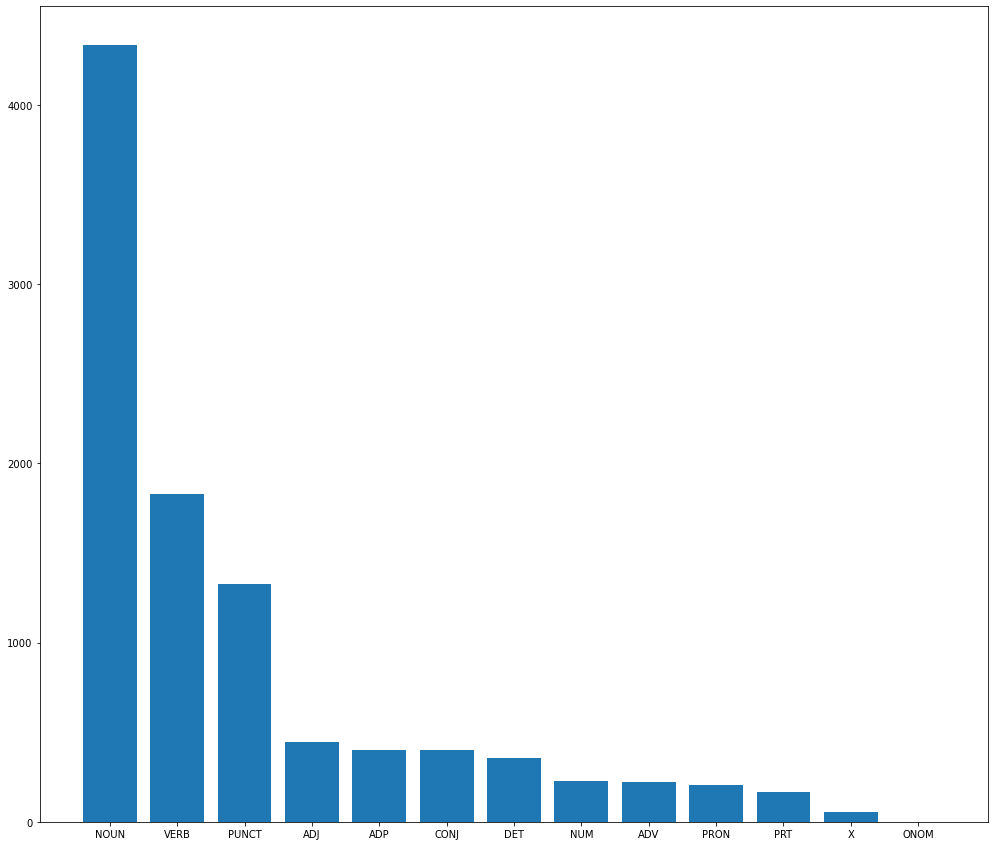

In [27]:
plot_pos(val_pos_counts)

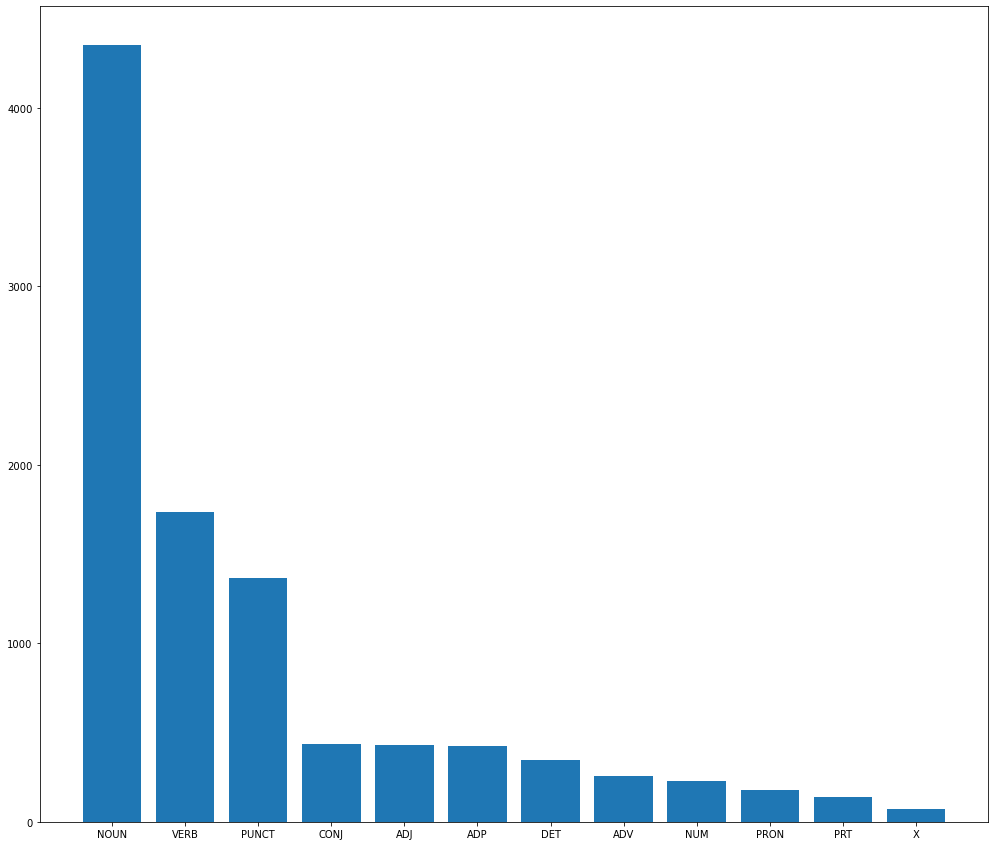

In [28]:
plot_pos(test_pos_counts)